In [1]:
import math
import pandas_datareader as web
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv("TSLA.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...,...
3218,2023-04-12,190.740005,191.580002,180.309998,180.539993,180.539993,150256300
3219,2023-04-13,182.960007,186.500000,180.940002,185.899994,185.899994,112933000
3220,2023-04-14,183.949997,186.279999,182.009995,185.000000,185.000000,96306500
3221,2023-04-17,186.320007,189.690002,182.690002,187.039993,187.039993,116662200


In [3]:
df.shape

(3223, 7)

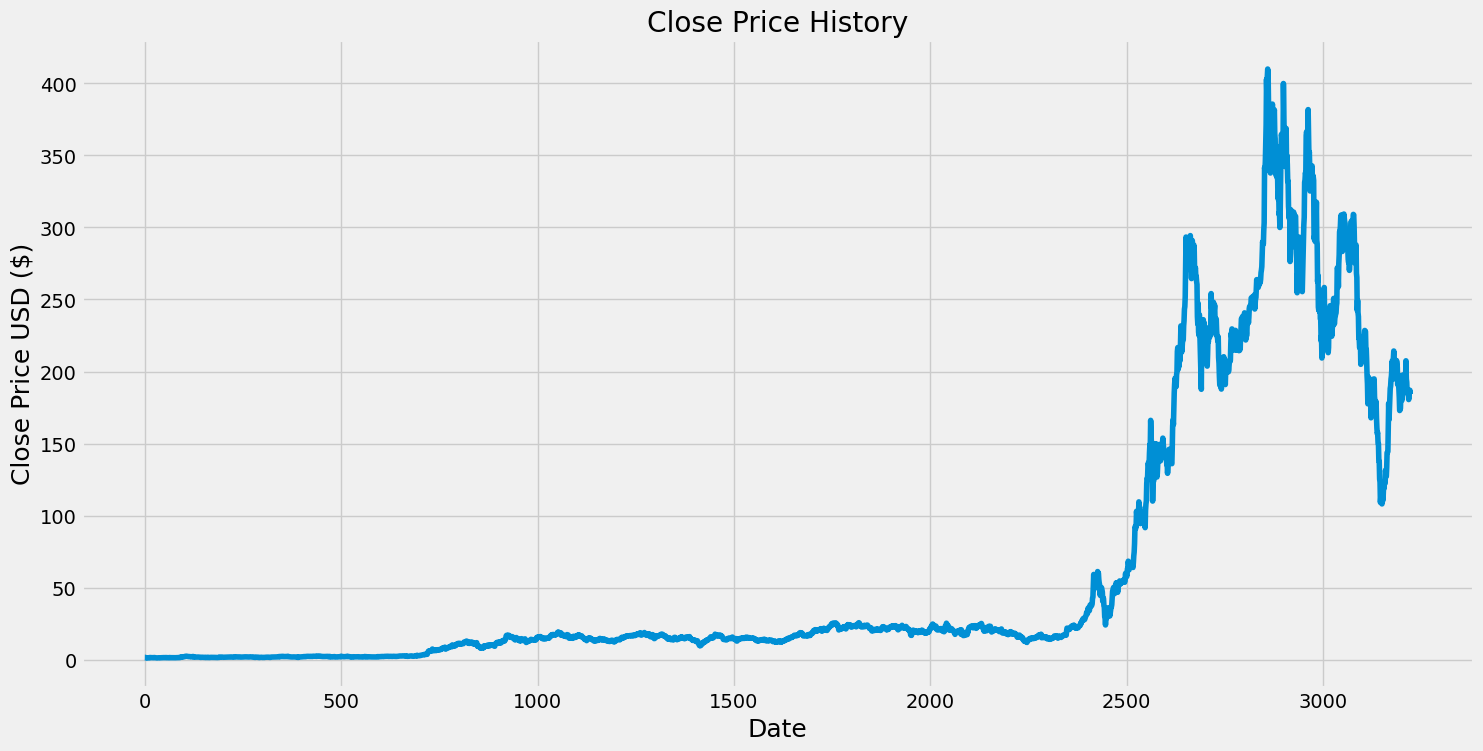

In [4]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize = 18)
plt.show()

In [5]:
data = df.filter(['Close'])
dataset = data.values
#get the number of rows to train the model on (80% of the data)
training_data_len = math.ceil(len(dataset) * .8 )

training_data_len

2579

In [6]:
#scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00131893],
       [0.00130915],
       [0.00100428],
       ...,
       [0.449839  ],
       [0.45482778],
       [0.44815161]])

In [9]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

x_train.shape

(2519, 60, 1)

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

In [11]:
#linear Regression

df3 = pd.read_csv("TSLA.csv")
df3

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...,...
3218,2023-04-12,190.740005,191.580002,180.309998,180.539993,180.539993,150256300
3219,2023-04-13,182.960007,186.500000,180.940002,185.899994,185.899994,112933000
3220,2023-04-14,183.949997,186.279999,182.009995,185.000000,185.000000,96306500
3221,2023-04-17,186.320007,189.690002,182.690002,187.039993,187.039993,116662200


In [12]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [13]:
df.shape

(3223, 7)

In [14]:
df3['Date'] = pd.to_datetime(df3.Date)

In [15]:
df3.drop('Adj Close', axis = 1, inplace = True)
df3.head()

,Date,Open,High,Low,Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,103003500


In [16]:
df3.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [17]:
df3.isna().any()

Date      False
Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

In [18]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3223 entries, 0 to 3222
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3223 non-null   datetime64[ns]
 1   Open    3223 non-null   float64       
 2   High    3223 non-null   float64       
 3   Low     3223 non-null   float64       
 4   Close   3223 non-null   float64       
 5   Volume  3223 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 151.2 KB


In [19]:
df3.describe()

,Open,High,Low,Close,Volume
count,3223.000000,3223.000000,3223.000000,3223.000000,3.223000e+03
mean,61.503223,62.892679,59.980186,61.467981,9.526609e+07
std,96.253462,98.473335,93.760425,96.142345,8.172672e+07
min,1.076000,1.108667,0.998667,1.053333,1.777500e+06
25%,9.450333,9.661000,9.219333,9.453333,4.340100e+07
50%,16.475332,16.682667,16.242001,16.473333,7.724790e+07
75%,34.048668,35.454666,33.332000,34.750000,1.208360e+08
max,411.470001,414.496674,405.666656,409.970001,9.140820e+08


<Axes: >

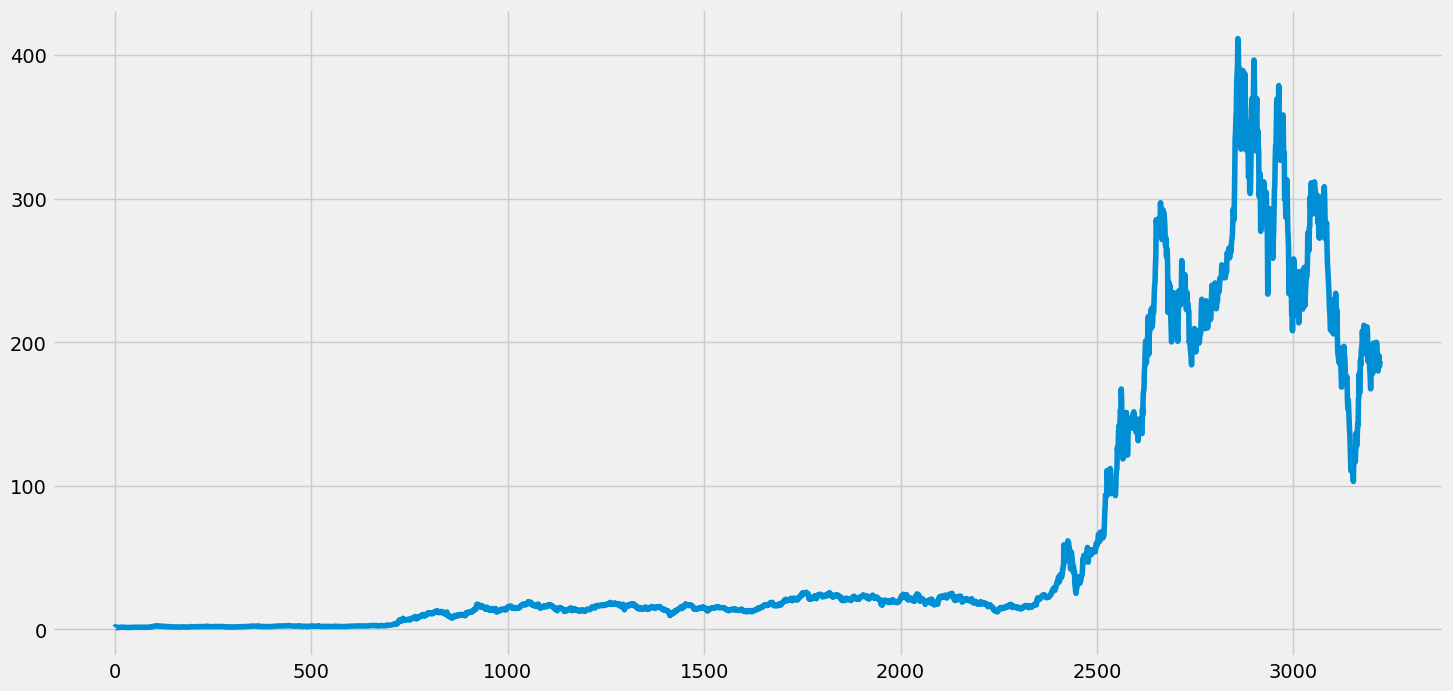

In [20]:
df3['Open'].plot(figsize= (16,8))

In [21]:
x = df3[['Open', 'High', 'Low','Volume']]
y = df3['Close']

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x,y, random_state = 0)

In [23]:
x_train.shape


(2417, 4)

In [24]:
x_test.shape

(806, 4)

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
regression = LinearRegression()

In [26]:
regression.fit(x_train,y_train)

LinearRegression()

In [27]:
print(regression.coef_)

[-6.90129932e-01  8.71997298e-01  8.17218763e-01  3.69901110e-10]


In [28]:
print(regression.intercept_)

-0.007448034220061572


In [29]:
predicted = regression.predict(x_test)

In [30]:
print(x_test)

            Open        High         Low     Volume
1764   24.247334   24.451332   23.974667   87727500
634     2.320000    2.320000    2.261333   10110000
3176  207.779999  214.000000  204.770004  215431400
1726   20.726667   20.919333   20.388000  105097500
1665   17.156668   17.557333   17.080000   58995000
...          ...         ...         ...        ...
879    10.000000   10.331333    9.988000  149122500
109     2.267333    2.286667    2.080000   30105000
2678  260.299988  264.896667  258.756653   53871300
927    16.942667   17.166668   16.629999  110416500
1106   17.057333   17.332666   17.034000   67095000

[806 rows x 4 columns]


In [31]:
predicted.shape

(806,)

In [32]:
dframe = pd.DataFrame(y_test,predicted)
dfr = pd.DataFrame({'Actual Price': y_test,'Predicted Price':predicted})
print(dfr)

      Actual Price  Predicted Price
1764     24.107332        24.205235
634       2.293333         2.266228
3176    207.320007       210.626355
1726     20.479334        20.630392
1665     17.472000        17.442088
...            ...              ...
879      10.094000        10.317689
109       2.156667         2.132716
2678    262.459991       262.821636
927      16.862667        16.900389
1106     17.180000        17.280137

[806 rows x 2 columns]


In [33]:
dfr.head(25)

,Actual Price,Predicted Price
1764,24.107332,24.205235
634,2.293333,2.266228
3176,207.320007,210.626355
1726,20.479334,20.630392
1665,17.472000,17.442088
961,13.857333,13.765282
661,2.563333,2.575990
1696,17.544001,17.493494
2433,44.532665,44.613781
562,2.070000,2.102897


In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score
import math

In [35]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,predicted))

Mean Absolute Error: 0.654687215586172


In [36]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test,predicted))

Mean Squared Error: 2.6381924225877578


In [37]:
print('Root Mean Squared Error:', math.sqrt(metrics.mean_squared_error(y_test,predicted)))

Root Mean Squared Error: 1.6242513421843794


In [38]:
regression.score(x_test, y_test)

0.9997305794039366

<Axes: >

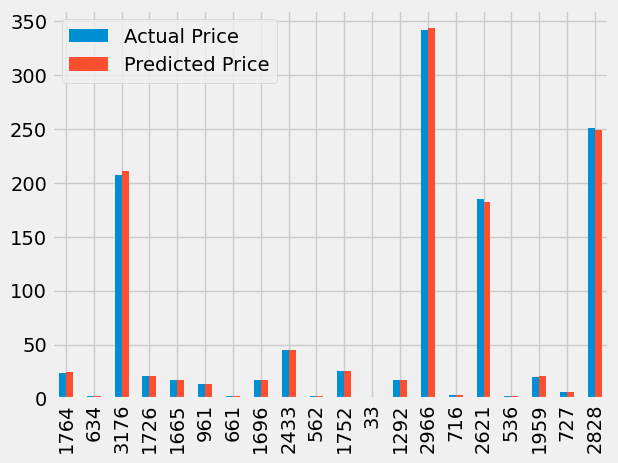

In [39]:
graph = dfr.head(20)
graph.plot(kind='bar')

In [40]:
#support vector machine

import pandas as pd
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [41]:
df = pd.read_csv('TSLA.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...,...
3218,2023-04-12,190.740005,191.580002,180.309998,180.539993,180.539993,150256300
3219,2023-04-13,182.960007,186.500000,180.940002,185.899994,185.899994,112933000
3220,2023-04-14,183.949997,186.279999,182.009995,185.000000,185.000000,96306500
3221,2023-04-17,186.320007,189.690002,182.690002,187.039993,187.039993,116662200


In [42]:
df = df.set_index(pd.DatetimeIndex(df['Date'].values))
df

,Date,Open,High,Low,Close,Adj Close,Volume
2010-06-29,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...,...
2023-04-12,2023-04-12,190.740005,191.580002,180.309998,180.539993,180.539993,150256300
2023-04-13,2023-04-13,182.960007,186.500000,180.940002,185.899994,185.899994,112933000
2023-04-14,2023-04-14,183.949997,186.279999,182.009995,185.000000,185.000000,96306500
2023-04-17,2023-04-17,186.320007,189.690002,182.690002,187.039993,187.039993,116662200


In [43]:
future_days = 5

In [44]:
df[str(future_days)+'_Day_Price_Forecast'] = df[['Close']].shift(-future_days)


In [45]:
df[['Close', str(future_days)+'_Day_Price_Forecast']]

,Close,5_Day_Price_Forecast
2010-06-29,1.592667,1.053333
2010-06-30,1.588667,1.164000
2010-07-01,1.464000,1.160000
2010-07-02,1.280000,1.136667
2010-07-06,1.074000,1.209333
...,...,...
2023-04-12,180.539993,NaN
2023-04-13,185.899994,NaN
2023-04-14,185.000000,NaN
2023-04-17,187.039993,NaN


In [46]:
X = np.array(df[['Close']])
X = X[:df.shape[0]- future_days]
print(X)

[[  1.592667]
 [  1.588667]
 [  1.464   ]
 ...
 [185.059998]
 [184.509995]
 [186.789993]]


In [47]:
y = np.array(df[str(future_days)+'_Day_Price_Forecast'])
y = y[:-future_days]
print(y)

[  1.053333   1.164      1.16     ... 185.       187.039993 184.309998]


In [48]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [49]:
from sklearn.svm import SVR
svr_rbf = SVR(kernel = 'rbf', C = 1e3, gamma = 0.00001)
svr_rbf.fit(x_train , y_train)

SVR(C=1000.0, gamma=1e-05)

In [50]:
svr_rbf_confidence = svr_rbf.score(x_test, y_test)
print('svr_rbf accuracy:' , svr_rbf_confidence)

svr_rbf accuracy: 0.9897435484862928


In [51]:
svm_prediction = svr_rbf.predict(x_test)
print(svm_prediction)

[ 14.17520568  13.67393412 234.72861077  16.61747552  11.14561991
  14.65115657  14.30601808  14.0776251   23.74808757   8.05033104
  16.09705116   2.0289432  326.51269576  15.4208511  298.48640326
   1.33832251  37.18867767  15.81560178 236.72400897 344.43984961
   1.93982645   1.95434715  14.02951913  19.28507575  18.1746315
 285.3893678    1.76891038  23.84234092  14.7291647   11.44152053
 290.37035593  96.41578173  17.8969838   14.24026896   1.89032585
 151.37020417  13.89944988 245.15710579  16.72297731  16.2609527
 284.02597749  15.95223055  25.9450178    2.36050073  13.1379477
   8.09117584  21.67281005 245.59261272  19.84785823   2.15374038
  21.9369539   62.03623007  19.98674847  17.6249139  345.51702229
  14.15894106   2.0170598  337.12154197   1.80058028  21.79286489
  14.82278831 287.13045315 224.3100774   23.81619522 154.1824725
   9.72248201  17.7640018    2.04874965  45.76276495  22.53214912
 105.21423529   1.4200509  260.32443594  12.99050889  18.24355042
  15.48877559 

In [52]:
print(y_test)

[ 13.34      12.494667 228.813339  16.916     12.689333  15.068667
  14.466     16.836     23.302      9.263333  14.870667   1.894
 359.200012  17.146667 371.333344   1.393333  48.655334  16.974001
 224.473328 328.983337   1.835333   1.828     15.095333  18.604668
  19.901333 300.029999   1.830667  23.726667  14.638667  11.64
 317.540009 101.120003  16.167334  14.148667   1.875333 140.210007
  13.155333 248.039993  16.708668  15.428667 302.869995  16.671333
  24.107332   2.241333  14.104      8.462667  20.102667 238.313339
  19.652666   2.207333  21.368668  45.266666  22.139999  18.817333
 360.640015  14.638667   2.252    343.503326   1.705333  20.870667
  13.384667 268.193329 236.16333   22.799999 141.973328   9.972
  16.562      2.172     46.898666  22.330667 104.557335   1.456
 260.916656  13.866     16.508667  16.565332  14.452    137.993332
  21.927334  17.943333  16.016001  14.550667 222.846664 240.546661
   2.333333  17.542667   1.383333  22.208668  23.454     12.495333
 290.423

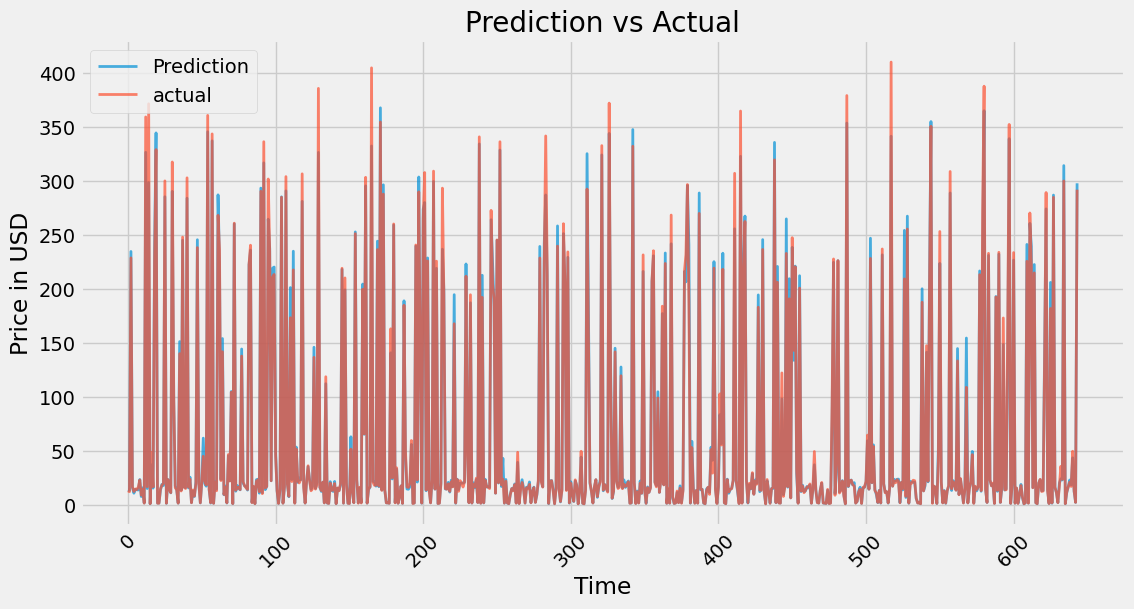

In [53]:
 plt.figure(figsize= (12,6))
plt.plot(svm_prediction, label = 'Prediction', lw = 2, alpha= .7)
plt.plot(y_test, label = 'actual', lw = 2 , alpha = .7)
plt.title('Prediction vs Actual')
plt.ylabel('Price in USD')
plt.xlabel('Time')
plt.legend()
plt.xticks(rotation = 45)
plt.show()